In [1]:
import os
import sys
import cv2

import matplotlib.pyplot as plt
import torch
from omegaconf import OmegaConf, DictConfig, ListConfig

sys.path.append('../../')

from torchok.constructor.config_structure import DatasetParams
from torchok.constructor.constructor import Constructor

/opt/conda/envs/torchok/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_params = {
    'data_folder': '/workdir/rbayazitov/detection/',
    'train': True,
    'download': False,
}

transform = ListConfig([
    DictConfig({
        'name': 'Resize',
        'params': {
            'width': 224,
            'height': 224
        }
    }),
    DictConfig({
        'name': 'ToTensorV2',
        'params': {
        }
    })
    
    ]
)


dataset_params = DictConfig({
    'name': 'COCOSegmentation', 
    'params': data_params, 
    'transform' :transform})

dataset = Constructor._create_dataset(dataset_params)
dataset

loading annotations into memory...
Done (t=13.86s)
creating index...
index created!
loading annotations into memory...
Done (t=0.37s)
creating index...
index created!


In [5]:
dataset[0]

{'image': tensor([[[255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          ...,
          [141., 192., 195.,  ...,  76.,  66.,  79.],
          [134., 180., 173.,  ...,  88.,  82.,  55.],
          [183., 214., 216.,  ...,  44.,  73.,  61.]],
 
         [[255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          ...,
          [106., 178., 167.,  ...,  76.,  56.,  85.],
          [ 89., 148., 135.,  ...,  86.,  79.,  60.],
          [158., 191., 188.,  ...,  41.,  96.,  77.]],
 
         [[255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          ...,
          [ 83., 139., 130.,  ...,  26.,  30.,  50.],
          [ 70., 115., 105.,  ...,  50.,  39.,  25.],
          [114., 136.,

In [7]:
sample = dataset.get_raw(0)
sample.keys()

dict_keys(['image', 'index', 'mask'])

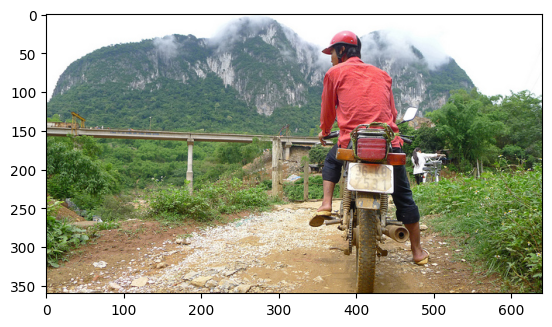

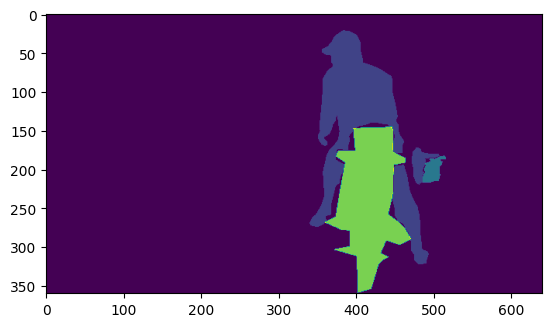

In [8]:
plt.imshow(sample['image'])
plt.show()

plt.imshow(sample['mask'])
plt.show()